In [56]:
#Zomato Analysis ¶
#Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


 Data Loading

In [58]:
zomato_data=pd.read_csv ("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv")

In [59]:
# Load the Country ISO code data
# Data Visualization (example: bar plot comparing Indian currency with other countries)
country_codes = pd.read_excel('https://github.com/nethajinirmal13/Training-datasets/blob/main/zomato/Country-Code.xlsx?raw=true')


Data cleaning

In [60]:
zomato_data.drop_duplicates (inplace=True)
zomato_data.shape

(9551, 21)

In [61]:

# Display the first few rows of the dataset
#print(zomato_data.head())

# Get information about the dataset
print(zomato_data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [62]:
zomato_data= zomato_data.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude'], axis = 1)

In [63]:
# Display summary statistics for numerical columns
zomato_data.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


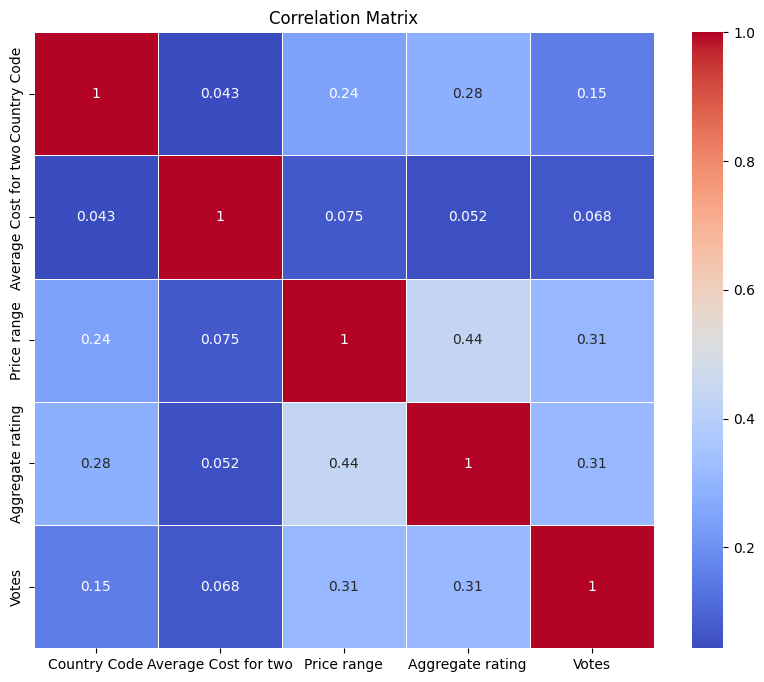

In [64]:
# Select only numeric columns
numeric_columns = zomato_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [65]:
# Check for missing values in each column
missing_values = zomato_data.isnull().sum()

print(missing_values)

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [66]:
feature_na = [i for i in zomato_data.columns if zomato_data[i].isnull().sum() > 0]
feature_na 

['Cuisines']

In [67]:
# Iterate through features with missing values
for i in feature_na:
    percentage_null = np.round((zomato_data[i].isnull().sum() / len(zomato_data[i])) * 100, 4)
    print(f"{i} has {percentage_null}% null values")


Cuisines has 0.0942% null values


In [68]:
zomato_data.Cuisines.unique ()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [69]:
# Replace missing values in 'Cuisines' with a placeholder value
zomato_data['Cuisines'].fillna('Not Specified', inplace=True)


In [18]:
zomato_data.rename({ 'Has Table booking' : 'Accepts_Tab1e_Booking',
'Rating color': 'Rating_Schema',
'Rating text' : 'Rating',
'Average Cost for two' : ' Avg_Cost' ,
'Has online delivery' : 'Online_DeIivery',
'Aggregate rating' : 'Aggregate_Rating'},
axis=1)

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Tab1e_Booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml郾 Gurme,208,哿stanbul,Karak韄y,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,Ceviz A埕ac郾,208,哿stanbul,Ko侓uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,Huqqa,208,哿stanbul,Kuru韄e侓me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,A侓侓k Kahve,208,哿stanbul,Kuru韄e侓me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [70]:

# Add a new column 'Currency' and set the value to 'rupees' for Indian entries
zomato_data['Currency'] = 'rupees'
zomato_data.loc[zomato_data['Country Code'] != 1, 'Currency'] = 'other_currency'

merged_data = pd.merge(zomato_data, country_codes, how='left', left_on='Country Code', right_on='Country Code')

# Save the modified dataset with the new column
merged_data.to_csv('zomato.csv', index=False)

Data Exploration

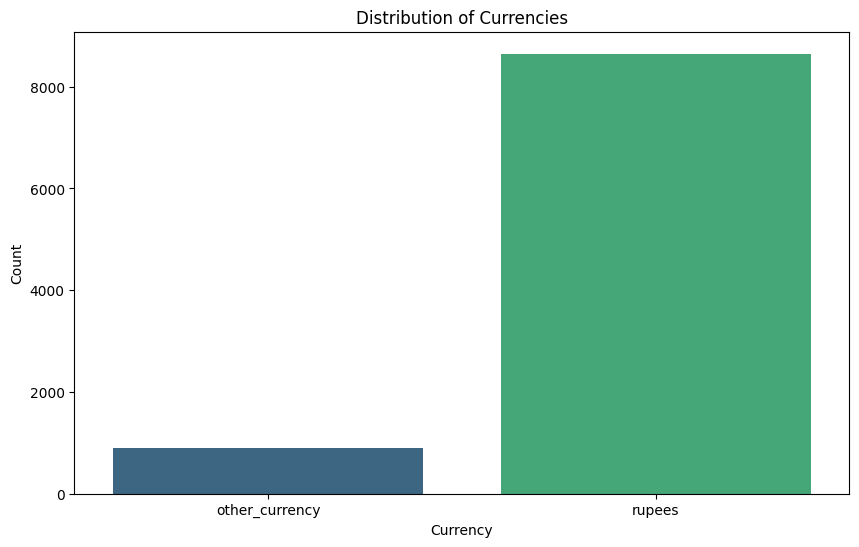

In [110]:




# Example: Plot a bar chart based on the new 'Currency' column with changed color
plt.figure(figsize=(10, 6))
sns.countplot(x='Currency', data=merged_data, palette='viridis')  # Change the palette here
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()





calculate avg rating for each restaurant

In [24]:
rating = pd. pivot_table(merged_data,index= 'Restaurant Name', values='Aggregate rating')   
rating

,Aggregate rating
Restaurant Name,
Let's Burrrp,0.0
#45,3.6
#Dilliwaala6,3.7
#InstaFreeze,0.0
#OFF Campus,3.7
...,...
t Lounge by Dilmah,3.6
tashas,4.1
wagamama,3.7


In [25]:
rating = rating.sort_values(by='Aggregate rating', ascending=False).head(15)
print(rating)


                                     Aggregate rating
Restaurant Name                                      
Caterspoint                                       4.9
Mazzaro's Italian Market                          4.9
Sagar Gaire Fast Food                             4.9
McGuire's Irish Pub & Brewery                     4.9
Milse                                             4.9
Solita                                            4.9
Ooma                                              4.9
Pom Pom's Teahouse and Sandwicheria               4.9
Braseiro da G礴vea                                 4.9
Carnival By Tresind                               4.9
Shorts Burger and Shine                           4.9
Flat Iron                                         4.9
Mainland China Restaurant                         4.9
Mama's Fish House                                 4.9
Atlanta Highway Seafood Market                    4.9


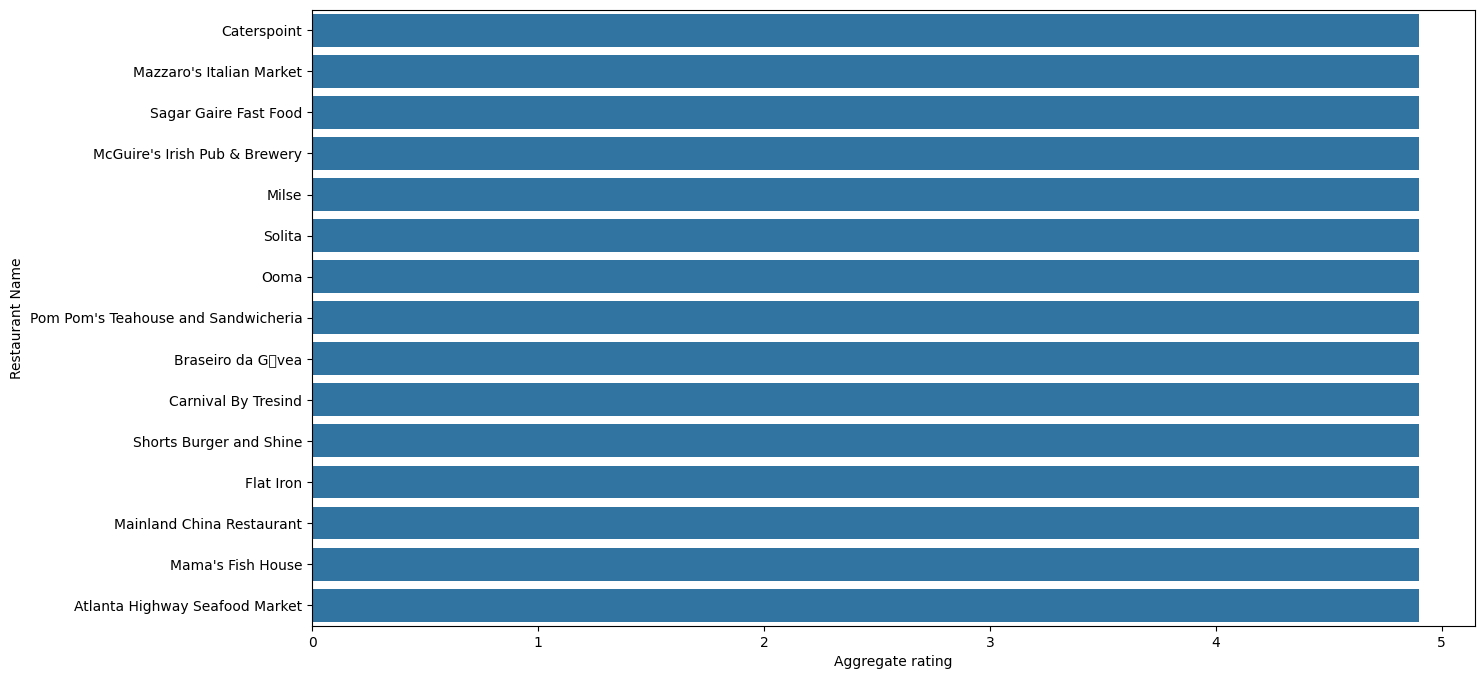

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(x=rating[0:20]['Aggregate rating'], y=rating[0:20].index, orient="h")
plt.show()


In [106]:
import plotly.express as px

# Assuming 'merged_data' is your DataFrame
top_restaurants = merged_data[['Restaurant Name', 'Aggregate rating', 'Votes']].sort_values(by=['Aggregate rating', 'Votes'], ascending=False).head(20)

# Create an interactive bar chart with Plotly Express
fig = px.bar(top_restaurants, x='Aggregate rating', y='Restaurant Name', color='Votes',
             orientation='h', title='Top 20 Restaurants by Aggregate Rating and Votes',
             labels={'Aggregate rating': 'Aggregate Rating', 'Restaurant Name': 'Restaurant Name'},
             color_continuous_scale='Inferno'
)  # Change the color scale to 'Blues'

# Show the plot
fig.show()



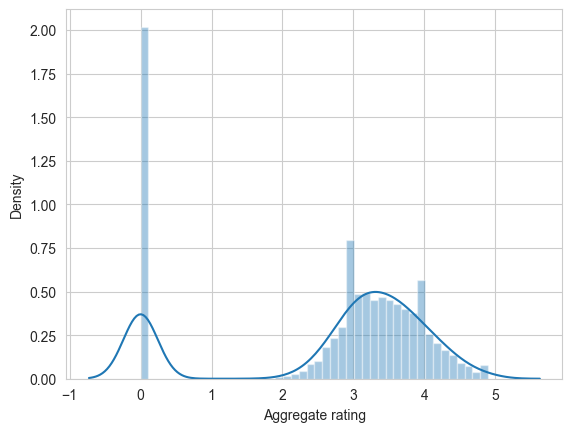

In [29]:
import seaborn as sns


# Assuming you have loaded your data and performed the necessary steps before this point
# Make sure merged_data is defined and contains the 'Aggregate rating' column

# Set the style
sns.set_style('whitegrid')

# Create a distribution plot
sns.distplot(merged_data['Aggregate rating'])

# Show the plot
plt.show()


In [30]:
from scipy. stats import normaltest
DataToTest = merged_data['Aggregate rating']


stat, p= normaltest(DataToTest)

print("stat=%0.2f,p=%0.030f" % (stat, p))
if p>0.05:
    print("Norma1 distribution")
else:
    print("Not a normal distribution")

stat=1336.17,p=0.000000000000000000000000000000
Not a normal distribution


Top restaurant chain

In [31]:
merged_data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

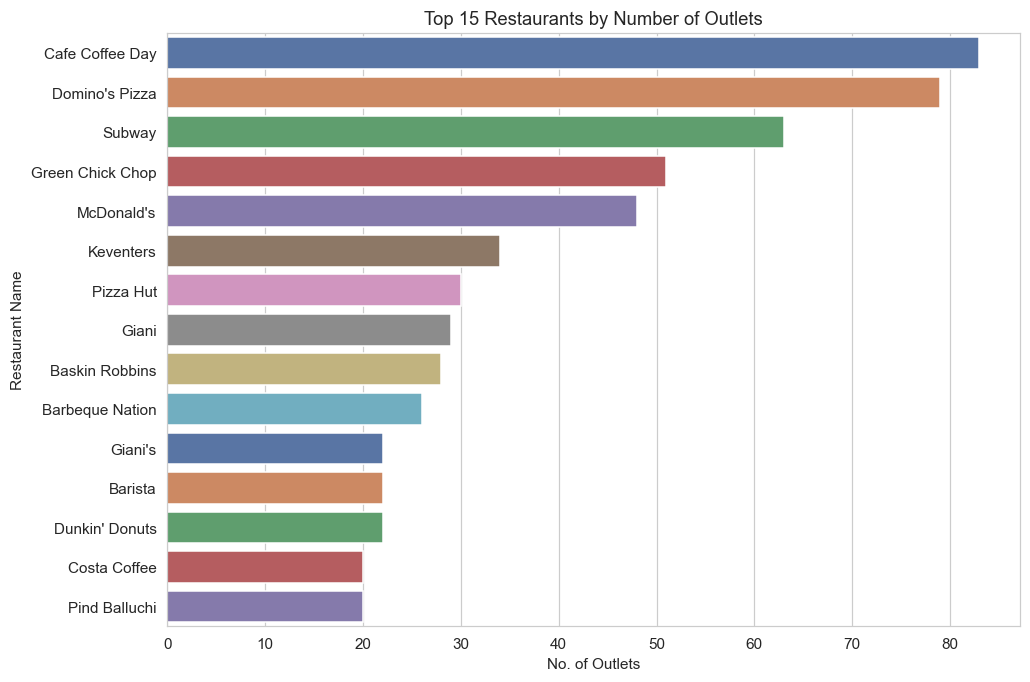

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7), dpi=110)
chains = merged_data['Restaurant Name'].value_counts().head(15)
sns.barplot(x=chains, y=chains.index, palette='deep')


plt.title("Top 15 Restaurants by Number of Outlets")
plt.show()






how many restaurants don't accept online orders

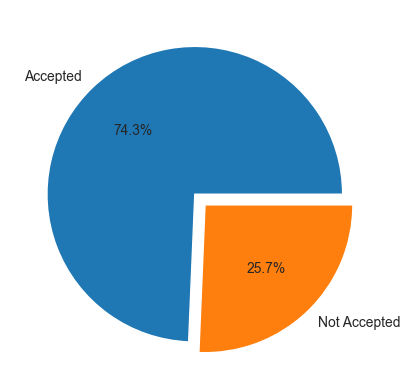

In [34]:
import matplotlib.pyplot as plt

# Count the values in the 'Has Online delivery' column
x = merged_data['Has Online delivery'].value_counts()

labels = ['Accepted', 'Not Accepted']

# Create a pie chart
plt.pie(x, labels=labels, explode=[0.0, 0.1], autopct='%1.1f%%')

# Display the pie chart
plt.show()


we see that around 74.3% of resturants accept online delivery

How many resturants had TABLE BOOKINGS?

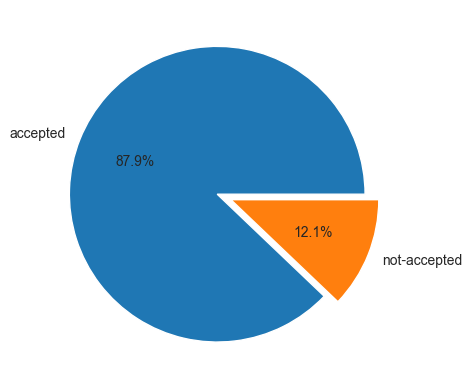

In [35]:
x = merged_data['Has Table booking'].value_counts()
labels=['accepted','not-accepted']

plt.pie(x,labels=labels, explode=[0.0, 0.1], autopct='%1.1f%%')
plt.show()

we observe that around 87,9% resturants have table booking

which restaurant had the highest voting? (means count of
rating given)

In [71]:
merged_data.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,other_currency,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,other_currency,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,other_currency,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,other_currency,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,other_currency,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [37]:
voting =merged_data.groupby('Restaurant Name')[['Votes']].mean()
voting

,Votes
Restaurant Name,
Let's Burrrp,0.0
#45,209.0
#Dilliwaala6,124.0
#InstaFreeze,2.0
#OFF Campus,216.0
...,...
t Lounge by Dilmah,34.0
tashas,374.0
wagamama,131.0


In [76]:
total_count = len(merged_data['Restaurant Name'].unique())
total_count


7446

In [38]:
voting['Votes'].describe()

count     7446.000000
mean       152.247584
std        401.467045
min          0.000000
25%          4.000000
50%         28.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64

In [40]:
high_vot = voting[voting['Votes'] >5000]



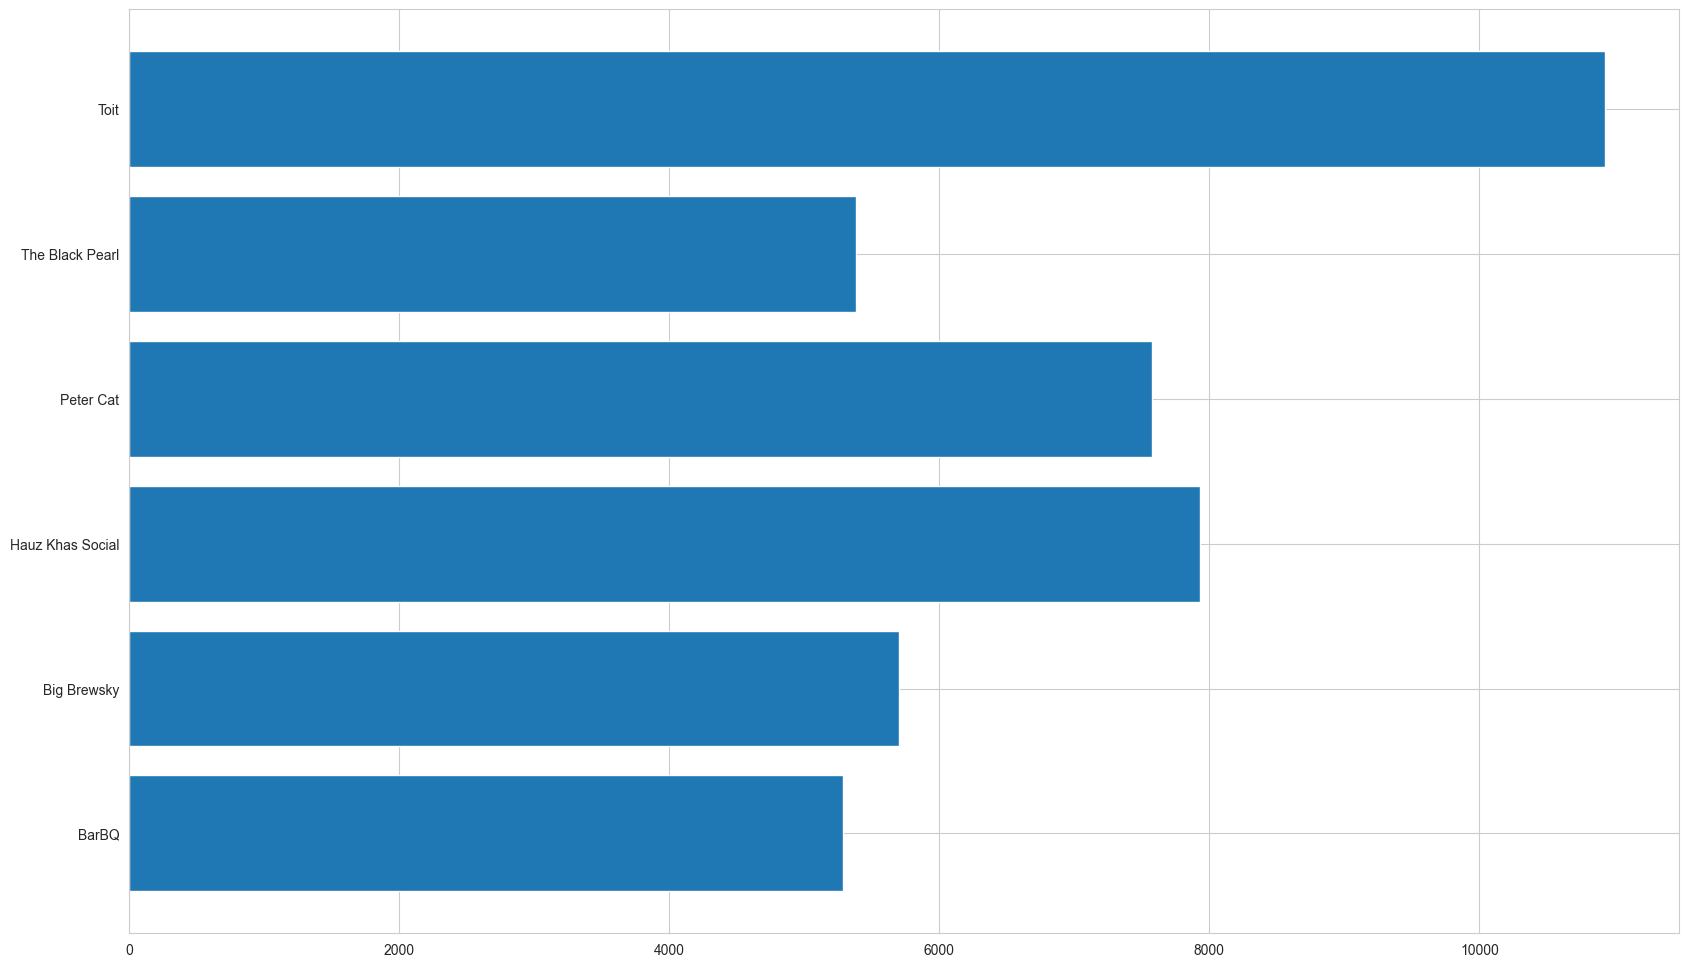

In [41]:
plt.figure(figsize=(20,12),dpi=100)
plt.barh(high_vot.index, high_vot['Votes'])
plt.show()


This is the barplot for count of ratings given by consumers to a particular resturant

Let's analyse the highly rated restaurants and worst restaurants based on number of ratings given

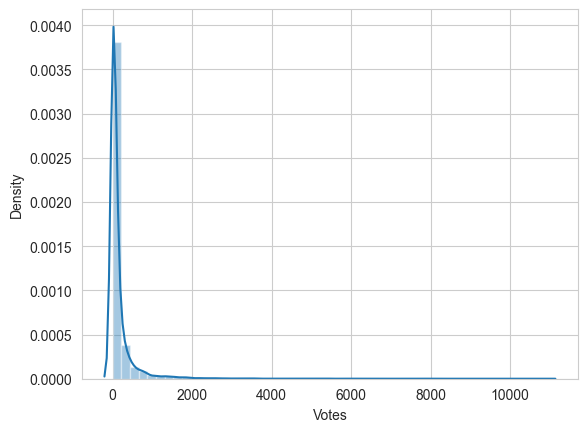

In [43]:
sns.distplot(merged_data['Votes'])
plt.show()

In [44]:
voting_rating = merged_data.groupby('Restaurant Name')[['Votes']].mean().sort_values('Votes',ascending=False)
voting_rating

,Votes
Restaurant Name,
Toit,10934.0
Hauz Khas Social,7931.0
Peter Cat,7574.0
Big Brewsky,5705.0
The Black Pearl,5385.0
...,...
New Bhappe Di Hatti,0.0
New Aggarwal Sweets & Fast Food,0.0
Nehra's Food Point,0.0


In [45]:
voting_rating['Restaurant Name'] = voting_rating.index


In [46]:
voting_rating = voting_rating.reset_index(drop=True)
voting_rating.head()


,Votes,Restaurant Name
0,10934.0,Toit
1,7931.0,Hauz Khas Social
2,7574.0,Peter Cat
3,5705.0,Big Brewsky
4,5385.0,The Black Pearl


In [47]:
voting_rating =pd.merge(voting_rating,merged_data[['Aggregate rating','Restaurant Name']])
voting_rating

,Votes,Restaurant Name,Aggregate rating
0,10934.0,Toit,4.8
1,7931.0,Hauz Khas Social,4.3
2,7574.0,Peter Cat,4.3
3,5705.0,Big Brewsky,4.5
4,5385.0,The Black Pearl,4.1
...,...,...,...
9546,0.0,New Bhappe Di Hatti,0.0
9547,0.0,New Aggarwal Sweets & Fast Food,0.0
9548,0.0,Nehra's Food Point,0.0
9549,0.0,Negi Restaurant,0.0


In [48]:
vote_top =voting_rating[voting_rating['Votes']>5000]
vote_top.head()

,Votes,Restaurant Name,Aggregate rating
0,10934.0,Toit,4.8
1,7931.0,Hauz Khas Social,4.3
2,7574.0,Peter Cat,4.3
3,5705.0,Big Brewsky,4.5
4,5385.0,The Black Pearl,4.1


In [49]:
vote_top=vote_top.groupby('Restaurant Name')[['Aggregate rating']].mean().sort_values('Aggregate rating',ascending=False)
vote_top

,Aggregate rating
Restaurant Name,
Toit,4.8
Big Brewsky,4.5
Hauz Khas Social,4.3
Peter Cat,4.3
BarBQ,4.2
The Black Pearl,4.1


highest Rated based on most number of Votes

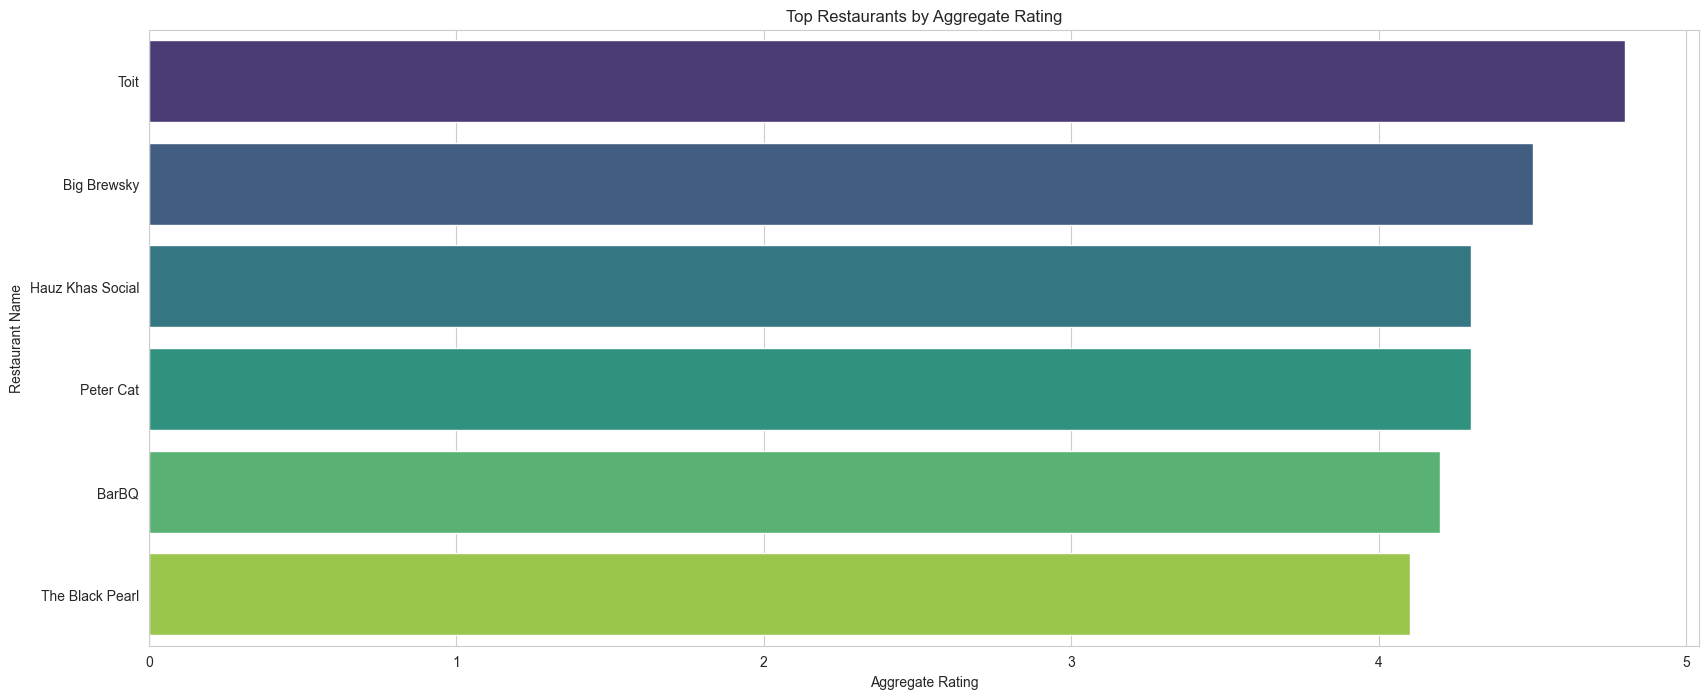

In [50]:

# Assuming 'vote_top' is your DataFrame
plt.figure(figsize=(20, 8), dpi=100)
sns.barplot(x=vote_top['Aggregate rating'], y=vote_top.index, orient="h", palette='viridis')

# Set labels and title
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top Restaurants by Aggregate Rating')

# Show the plot
plt.show()


'Toit Company' is the most voted resturant with the average rating of 4.8

In [51]:
bad_count=voting_rating[(voting_rating["Aggregate rating"]<3) & (voting_rating["Aggregate rating"]>0)]
bad_count


,Votes,Restaurant Name,Aggregate rating
44,2460.000000,My Bar Lounge & Restaurant,2.7
51,2412.000000,The Wine Company,2.4
238,1096.000000,My Bar Square,2.5
532,658.571429,Khan Chacha,2.9
653,549.000000,Not Just Paranthas,2.7
...,...,...,...
7913,2.500000,Aggarwal Sweet & Bakers,2.9
7918,2.250000,Chai Garam,2.9
7928,2.000000,Hot & Spicy,2.9
8010,2.000000,Fresh Meat CO,2.9


In [64]:
bad_restaurants = (bad_count[bad_count['Votes'] > 500].groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=True).reset_index())
bad_restaurants

,Restaurant Name,Aggregate rating
0,The Wine Company,2.40
1,My Bar Square,2.50
2,Cheenos,2.60
3,Karim's,2.65
4,My Bar Lounge & Restaurant,2.70
5,Not Just Paranthas,2.70
6,Khan Chacha,2.90
7,Rajasthali,2.90


worst restaurants based on highest number of votes given

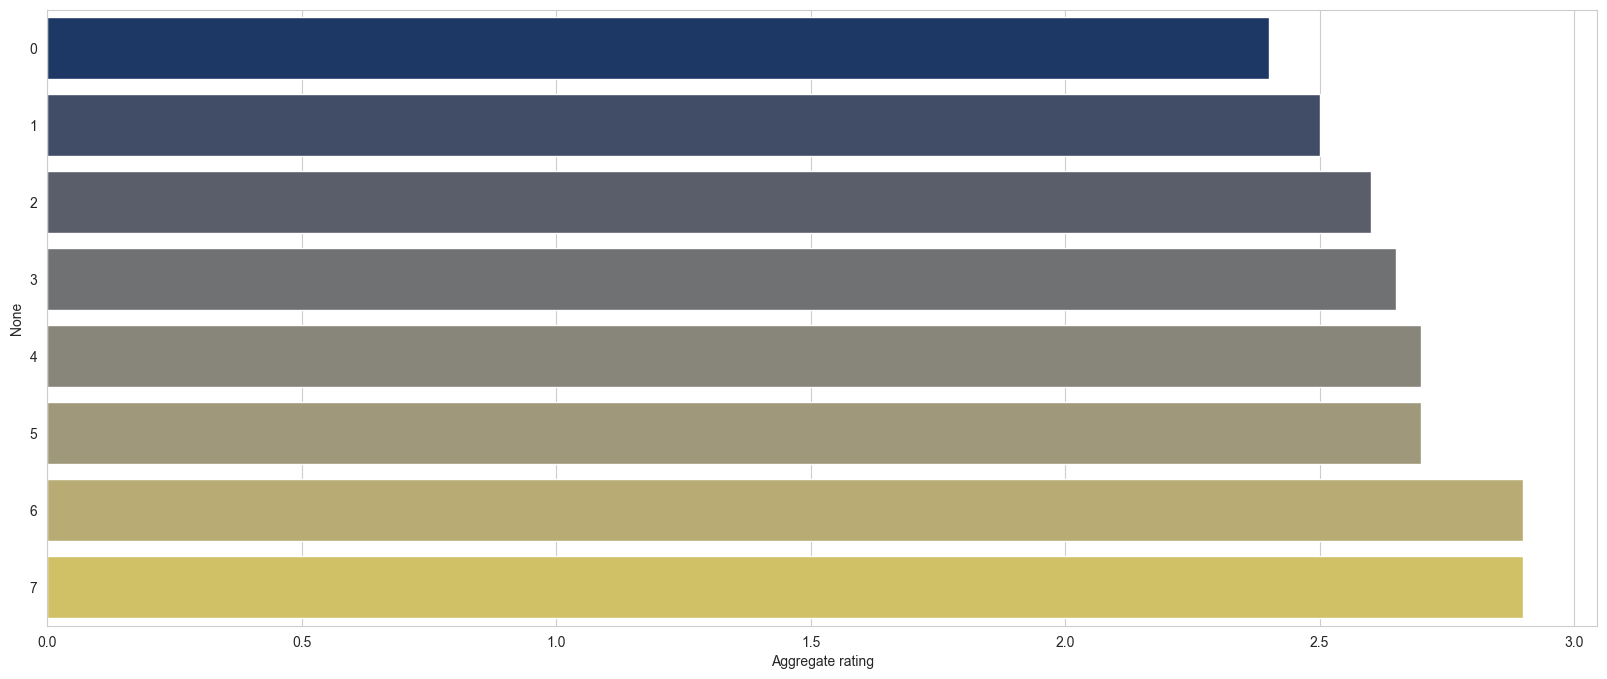

In [69]:
plt.figure(figsize=(20, 8), dpi=100)
sns.barplot(x=bad_restaurants['Aggregate rating'], y=bad_restaurants.index, orient="h", palette='cividis')
# Show the plot
plt.show()


These resturants have good votes given by the consumer but less rating..which means there is
something wrong with these resturants

location in which we have highest number of
restaurants

In [80]:
merged_data["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras韄lia', 'Rio de Janeiro', 'S恚o Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham 

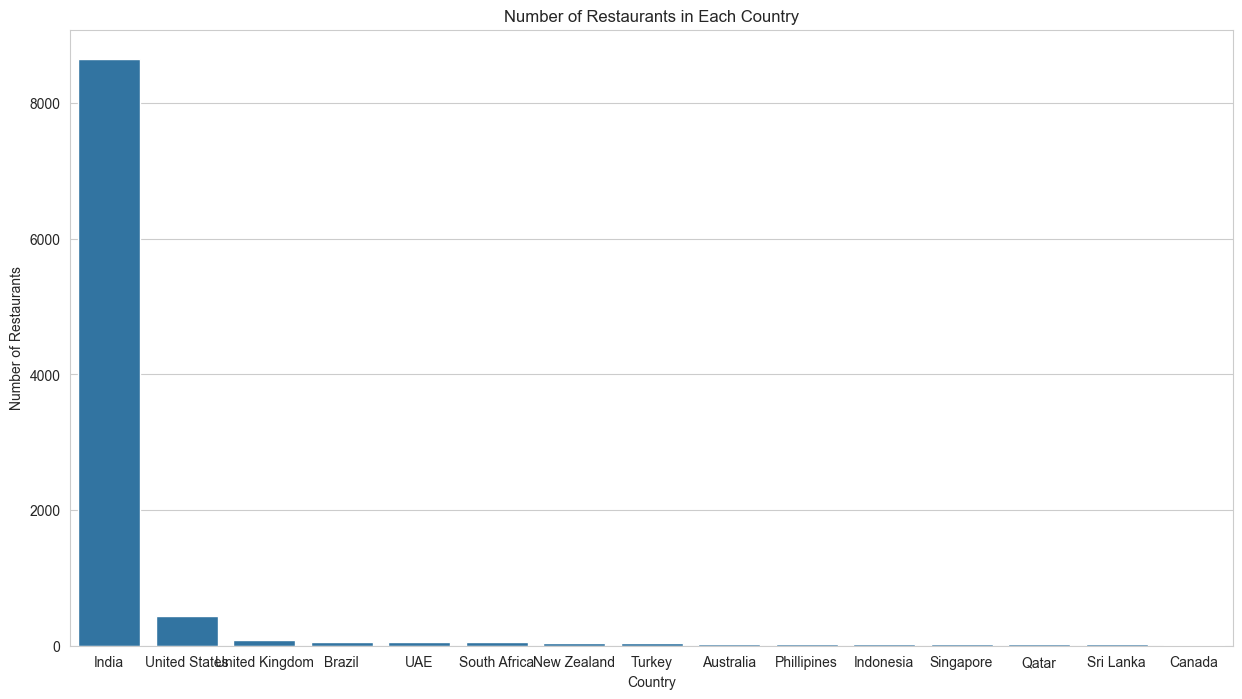

In [88]:
country_rest=merged_data["Country"].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=country_rest.index, y=country_rest.values)
plt.title('Number of Restaurants in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.show()


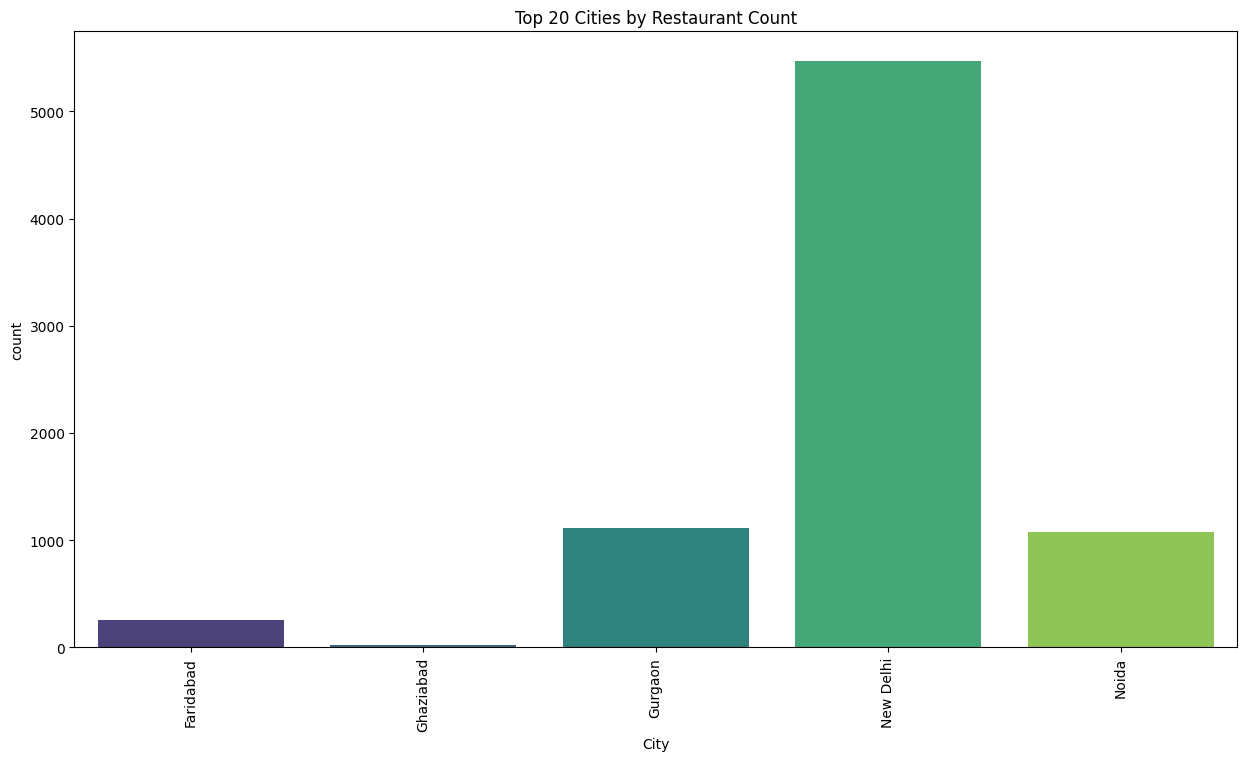

In [95]:
# Get the top 20 cities by count
# Assuming 'merged_data' is your DataFrame
plt.figure(figsize=(15, 8))

# Get the top 20 cities by count
city_rest = merged_data["City"].value_counts().head(5)

# Countplot
sns.countplot(x='City', data=merged_data[merged_data['City'].isin(city_rest.index)], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Cities by Restaurant Count')
plt.show()

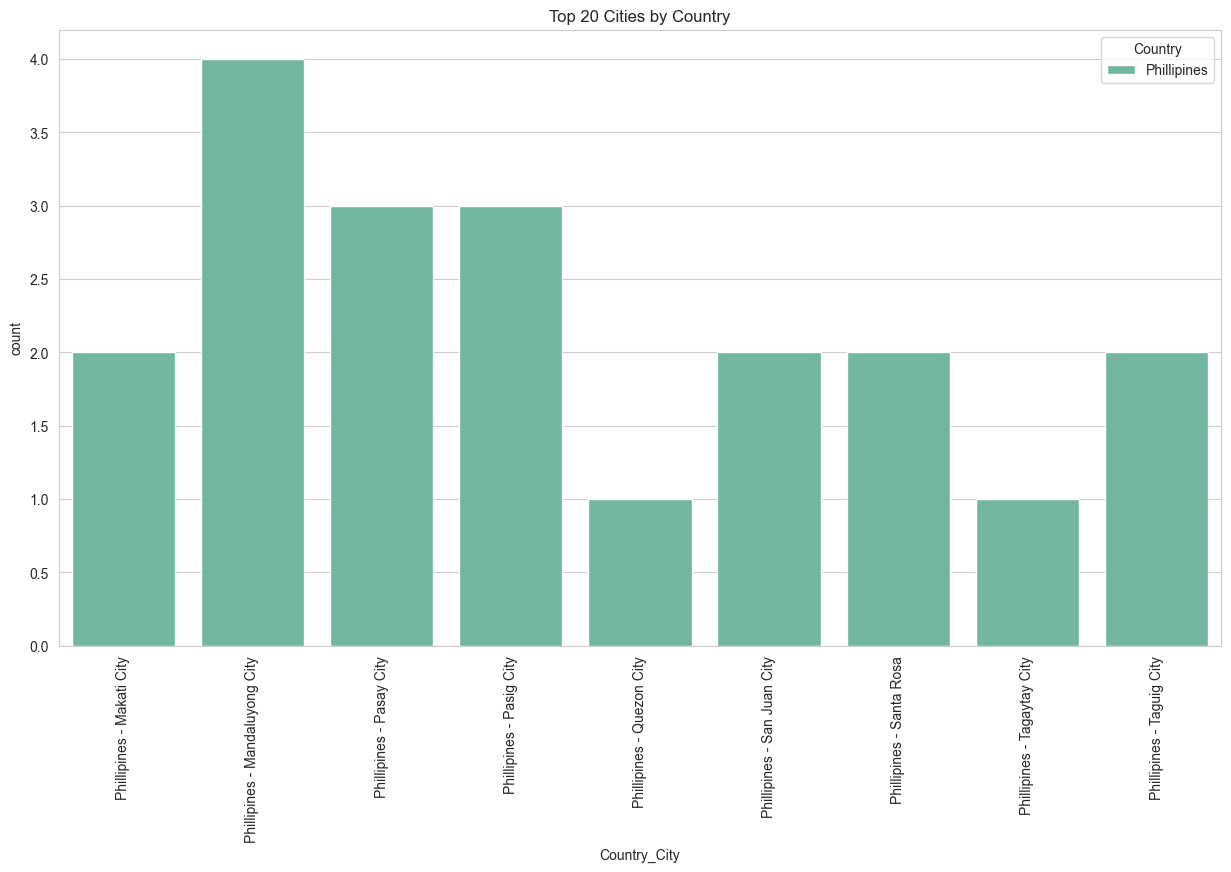

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your DataFrame
plt.figure(figsize=(15, 8))

# Join 'Country' and 'City' columns
merged_data['Country_City'] = merged_data['Country'] + ' - ' + merged_data['City']

# Countplot with color based on 'Country'
sns.countplot(x='Country_City', data=merged_data[0:20], hue='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Top 20 Cities by Country')
plt.show()


Barplot of number of resturants in any location

Identify the top 10 cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


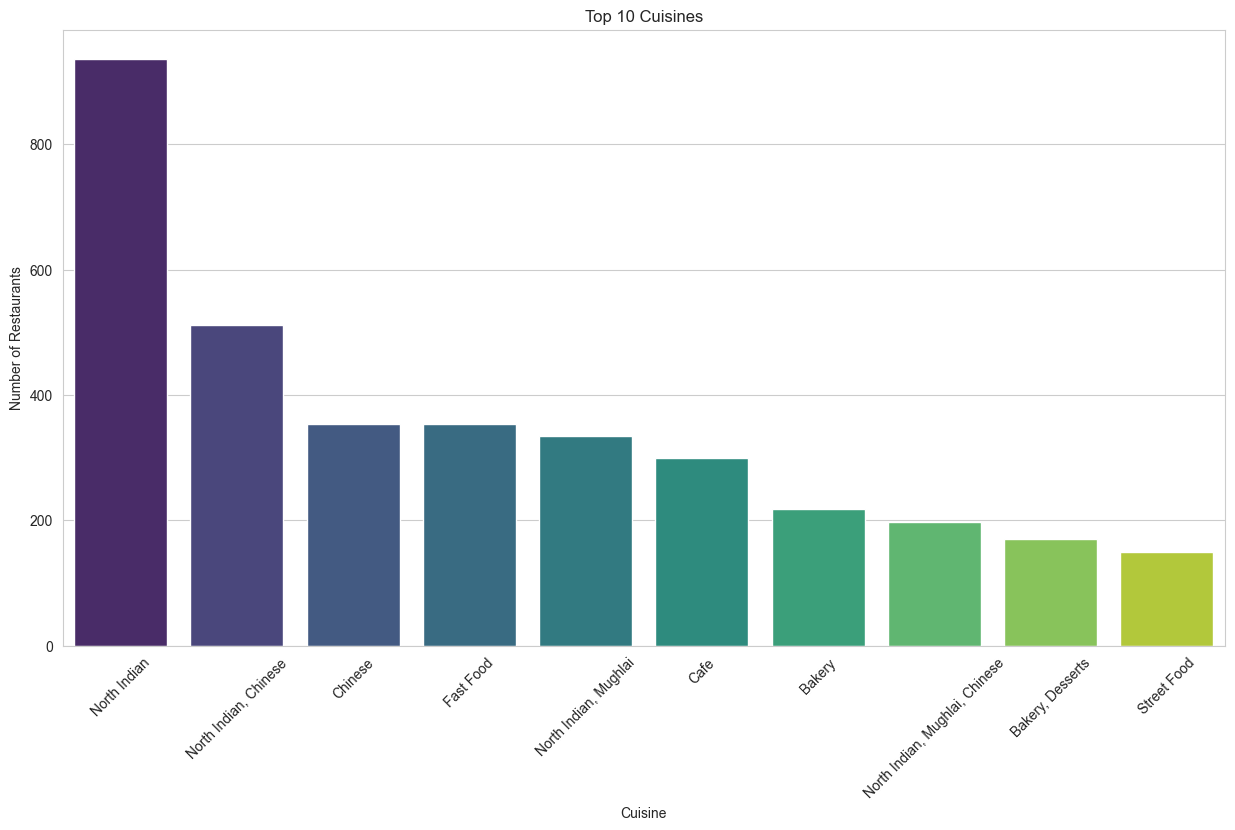

In [101]:

# Replace 'your_counts_series' with the actual name of your counts series
cuisine_counts = merged_data['Cuisines'].value_counts().head(10)
print(cuisine_counts)
# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()


<Axes: title={'center': 'Top 15 Restaurants with maximum outlets'}, ylabel='count'>

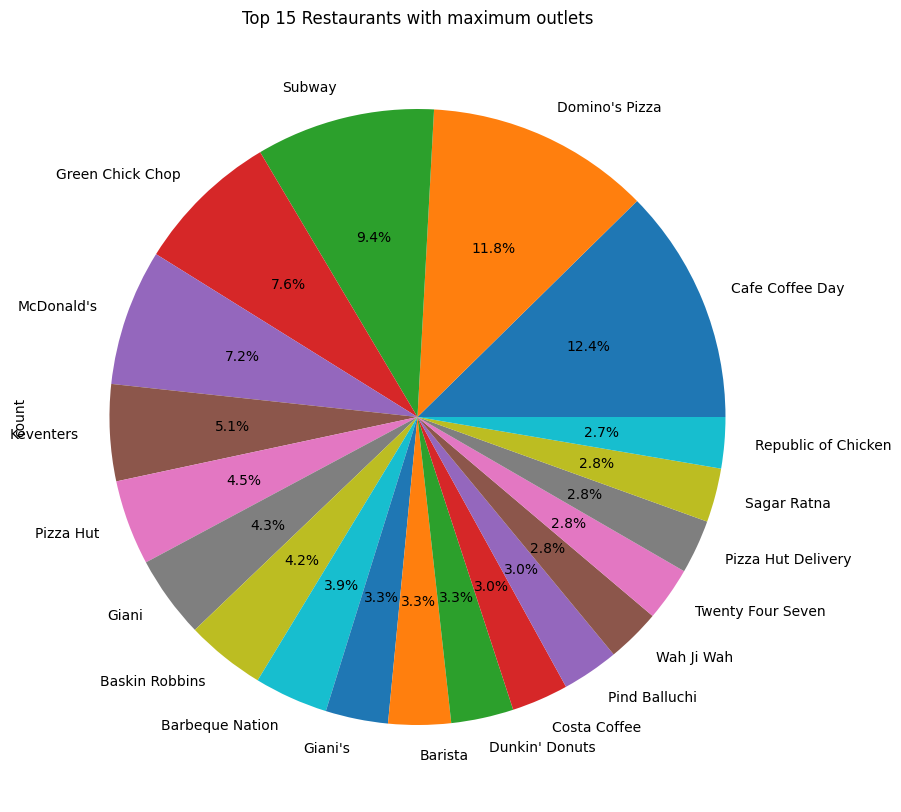

In [41]:
# Plotting pie chart with title and float with 1 decimal points
merged_data['Restaurant Name'].value_counts().head(20).plot(kind='pie',figsize=(10,10), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')

Barplot of top 10 cuisines preffered by customers

Check the distribution for cost of 2 people

In [102]:
merged_data['Average Cost for two'].isna().sum()

0

In [112]:
merged_data['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int32

In [114]:
merged_data['Average Cost for two'] = merged_data['Average Cost for two'].astype(str).str.replace(',', '')
#merged_data['Average Cost for two'] = pd.to_numeric(merged_data['Average Cost for two'], errors='coerce')


In [115]:
merged_data['Average Cost for two']=merged_data['Average Cost for two'].astype(int)

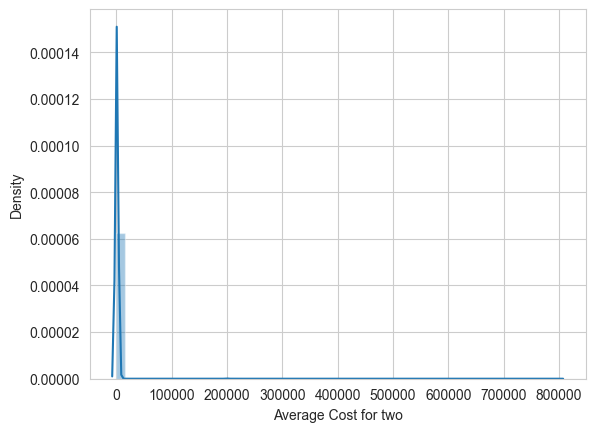

In [116]:
sns.distplot(merged_data['Average Cost for two'])
plt.show()

In [117]:
merged_data['Average Cost for two'].describe()

count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

In [118]:
merged_data[merged_data['Average Cost for two']>2000]

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Country_City
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,other_currency,Yes,No,4,4.4,Green,Very Good,270,Phillipines,Phillipines - Mandaluyong City
8,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Sofitel Philippine Plaza Manila, Pasay City",120.980090,14.552990,"European, Asian, Indian",6000,other_currency,Yes,No,4,4.9,Dark Green,Excellent,621,Phillipines,Phillipines - Pasay City
20,NIU by Vikings,162,Taguig City,"SM Aura Premier, Bonifacio Global City, Taguig...",121.053725,14.545858,"Seafood, American, Mediterranean, Japanese",3000,other_currency,Yes,No,4,4.7,Dark Green,Excellent,535,Phillipines,Phillipines - Taguig City
630,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Tajganj",78.044095,27.160934,"North Indian, Mughlai",2500,rupees,No,No,4,4.3,Green,Very Good,133,India,India - Agra
631,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Tajganj",78.044095,27.160934,Mughlai,2500,rupees,No,No,4,4.0,Green,Very Good,41,India,India - Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,Arabian Knights,191,Colombo,"Kollupitiya, Colombo 03",79.852248,6.904392,"Middle Eastern, Arabian",2400,other_currency,No,No,3,4.2,Green,Very Good,158,Sri Lanka,Sri Lanka - Colombo
9511,Cricket Club Cafe,191,Colombo,"Kollupitiya, Colombo 03",0.000000,0.000000,"Continental, American, Seafood",3000,other_currency,No,No,3,4.2,Green,Very Good,171,Sri Lanka,Sri Lanka - Colombo
9512,The Manhattan Fish Market,191,Colombo,"Kollupitiya, Colombo 03",79.853364,6.906814,"Seafood, Italian",4500,other_currency,No,No,4,4.0,Green,Very Good,196,Sri Lanka,Sri Lanka - Colombo
9513,The Sizzle,191,Colombo,"Kollupitiya, Colombo 03",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,other_currency,No,No,3,4.2,Green,Very Good,286,Sri Lanka,Sri Lanka - Colombo


Distibution of for 2 in resturants most of the resurants costs below Rs. 1000

In [13]:
# Unique values in the 'City' column
unique_cities = merged_data['City'].unique()
print("Unique Cities:", unique_cities)

# Unique values in the 'Cuisines' column
unique_cuisines = merged_data['Cuisines'].unique()
print("Unique Cuisines:", unique_cuisines)

# Unique values in the 'Rating color' column
unique_rating_colors = merged_data['Rating color'].unique()
print("Unique Rating Colors:", unique_rating_colors)

# Unique values in the 'Rating text' column
unique_rating_texts = merged_data['Rating text'].unique()
print("Unique Rating Texts:", unique_rating_texts)

# Unique values in the 'Country' column
unique_countries = merged_data['Country'].unique()
print("Unique Countries:", unique_countries)


Unique Cities: ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras韄lia'
 'Rio de Janeiro' 'S恚o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland Station' 'Waterloo'
 'Weirton' 'Winchester Bay' 'Yorkton' 'Abu Dhabi' 'Dubai' 'Sharjah' '

In [30]:
# Check unique values in the 'Currency' column
unique_currency = merged_data['Currency'].unique()
print("Unique Currency:", unique_currency)

Unique Currency: ['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)' 'Pounds(專)'
 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)' 'Turkish Lira(TL)']


Currency Analysis:

In [107]:
# Explore the distribution of currencies using a bar chart
currency_counts = merged_data['Currency'].value_counts()
fig_currency_distribution = px.bar(currency_counts, x=currency_counts.index, y=currency_counts.values,
                                   title='Distribution of Currencies',
                                   labels={'index': 'Currency', 'y': 'Count'})
fig_currency_distribution.show()




Cuisine Analysis:

In [ ]:
# Check unique values in the 'Cuisines' column
unique_cuisines = merged_data['Cuisines'].unique()
print("Unique Cuisines:", unique_cuisines)

# Explore the distribution of cuisines using a bar chart
cuisine_counts = merged_data['Cuisines'].value_counts().head(10)  # Displaying the top 10 cuisines
fig = px.bar(cuisine_counts, x=cuisine_counts.index, y=cuisine_counts.values, title='Top 10 Cuisines',
             labels={'index': 'Cuisine', 'y': 'Count'}, height=400)
fig.show()


Unique Cuisines: ['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


 Rating Analysis:

In [22]:
# Check unique values in the 'Rating color' and 'Rating text' columns
unique_rating_colors = merged_data['Rating color'].unique()
unique_rating_texts = merged_data['Rating text'].unique()

print("Unique Rating Colors:", unique_rating_colors)
print("Unique Rating Texts:", unique_rating_texts)

# Explore the distribution of ratings using a bar chart
rating_counts = merged_data['Rating text'].value_counts()
fig = px.bar(rating_counts, x=rating_counts.index, y=rating_counts.values, title='Rating Distribution',
             labels={'index': 'Rating Text', 'y': 'Count'}, height=400)
fig.show()

Unique Rating Colors: ['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']
Unique Rating Texts: ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


City Analysis:

In [43]:
# Check unique values in the 'City' column
unique_cities = merged_data['City'].unique()
print("Unique Cities:", unique_cities)

# Explore the distribution of restaurants across different cities
city_counts = merged_data['City'].value_counts().head(10)  # Displaying the top 10 cities
fig = px.bar(city_counts, x=city_counts.index, y=city_counts.values, title='Top 10 Cities with Most Restaurants',
             labels={'index': 'City', 'y': 'Count'}, height=400)
fig.show()



Unique Cities: ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras韄lia'
 'Rio de Janeiro' 'S恚o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland Station' 'Waterloo'
 'Weirton' 'Winchester Bay' 'Yorkton' 'Abu Dhabi' 'Dubai' 'Sharjah' '

cost analysis

In [41]:
# Scatter Plot for Average Cost vs. Aggregate Rating with Color by Cuisine
scatter_plot_cost_rating_color = px.scatter(merged_data, x='Average Cost for two', y='Aggregate rating',
                                            color='Cuisines',
                                            title='Scatter Plot of Average Cost vs. Aggregate Rating with Cuisine Color',
                                            labels={'Average Cost for two': 'Average Cost', 'Aggregate rating': 'Aggregate Rating'})
scatter_plot_cost_rating_color.show()






Country-wise Analysis

In [44]:
# Distribution of Restaurants by Country:
# Example: Bar chart for the distribution of restaurants by country
country_distribution = merged_data['Country'].value_counts()
fig_country_distribution = px.bar(country_distribution, x=country_distribution.index, y=country_distribution.values,
                                   title='Distribution of Restaurants by Country',
                                   labels={'x': 'Country', 'y': 'Count'})
fig_country_distribution.show()


In [96]:
#Average Cost Comparison:
# Example: Box plot for average cost comparison by country
fig_avg_cost_comparison = px.box(merged_data, x='Country', y='Average Cost for two',
                                 title='Average Cost Comparison by Country',
                                 labels={'x': 'Country', 'y': 'Average Cost'})
fig_avg_cost_comparison.show()


In [108]:
#Rating Analysis by Country:
# Example: Violin plot for rating distribution by country
fig_rating_distribution = px.violin(merged_data, x='Country', y='Aggregate rating',
                                    title='Rating Distribution by Country',
                                    labels={'x': 'Country', 'y': 'Aggregate Rating'})
fig_rating_distribution.show()




In [97]:
# Cuisine Analysis by Country:
# Example: Bar chart for top cuisines in each country
top_cuisines_by_country = merged_data.groupby(['Country', 'Cuisines']).size().reset_index(name='Count').head(10)
fig_top_cuisines = px.bar(top_cuisines_by_country, x='Country', y='Count', color='Cuisines',
                          title='Top Cuisines in Each Country')
fig_top_cuisines.show()



price range

In [38]:
# Explore the Distribution of Average Costs
# Create a histogram for the distribution of average costs for two
# Create a bar chart for the distribution of price ranges
price_range_distribution = px.bar(merged_data['Price range'].value_counts(), x=merged_data['Price range'].value_counts().index, 
                                  y=merged_data['Price range'].value_counts().values, 
                                  title='Distribution of Price Ranges',
                                  labels={'x': 'Price Range', 'y': 'Count'})
price_range_distribution.show()






# Online Delivery and Ratings Analysis (Pie Chart)
online_delivery_ratings = merged_data.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
fig_online_delivery_ratings = px.pie(online_delivery_ratings, names='Has Online delivery', values='Aggregate rating',
                                     title='Online Delivery and Ratings Distribution',
                                     labels={'Has Online delivery': 'Online Delivery'},
                                     color_discrete_map={0: 'red', 1: 'green'})
fig_online_delivery_ratings.show()

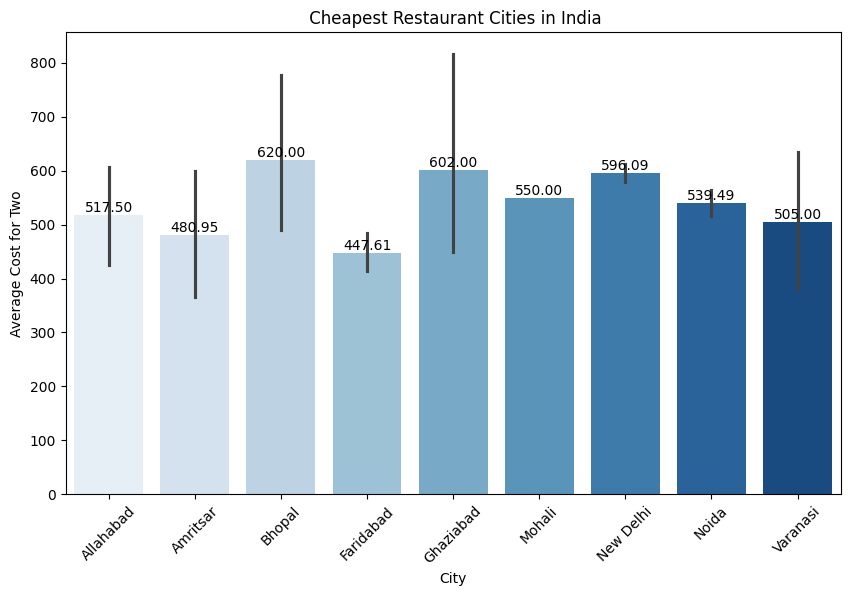

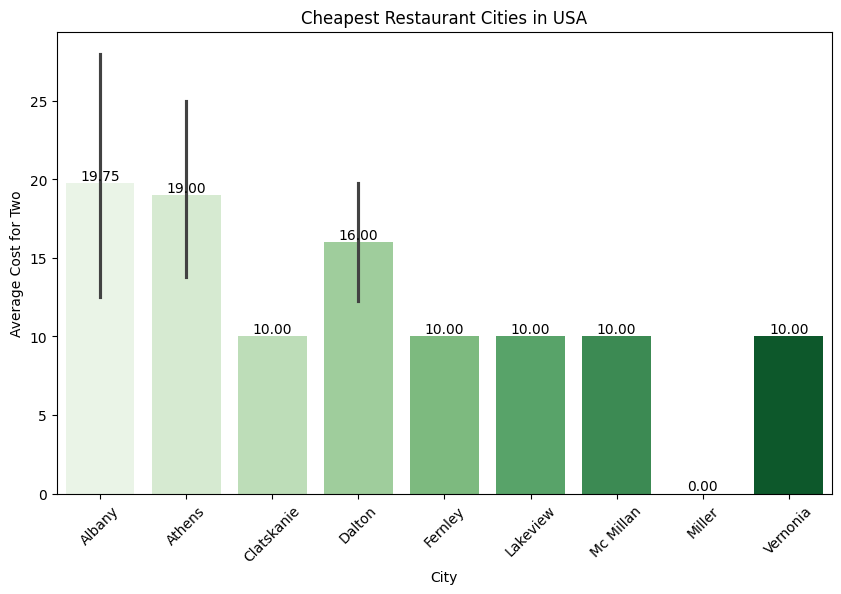

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add values on top of the bars
def add_values_on_bars(ax, space=0.01):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + space,
                f'{height:.2f}', ha='center', va='bottom')

# Filter data for India and the USA
india_data = merged_data[merged_data['Country'] == 'India']
usa_data = merged_data[merged_data['Country'] == 'United States']

# Find the 9 cities with the cheapest average cost for two in India
cheapest_cities_india = india_data.groupby('City')['Average Cost for two'].mean().nsmallest(9).index

# Find the 9 cities with the cheapest average cost for two in the USA
cheapest_cities_usa = usa_data.groupby('City')['Average Cost for two'].mean().nsmallest(9).index

# Plot the bar chart for India
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=india_data[india_data['City'].isin(cheapest_cities_india)]['City'],
                  y=india_data[india_data['City'].isin(cheapest_cities_india)]['Average Cost for two'],
                  palette='Blues')  # Change the color palette
plt.title(' Cheapest Restaurant Cities in India')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)

# Add values on top of the bars
add_values_on_bars(ax1)

plt.show()

# Plot the bar chart for the USA
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=usa_data[usa_data['City'].isin(cheapest_cities_usa)]['City'],
                  y=usa_data[usa_data['City'].isin(cheapest_cities_usa)]['Average Cost for two'],
                  palette='Greens')  # Change the color palette
plt.title('Cheapest Restaurant Cities in USA')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)

# Add values on top of the bars
add_values_on_bars(ax2)

plt.show()


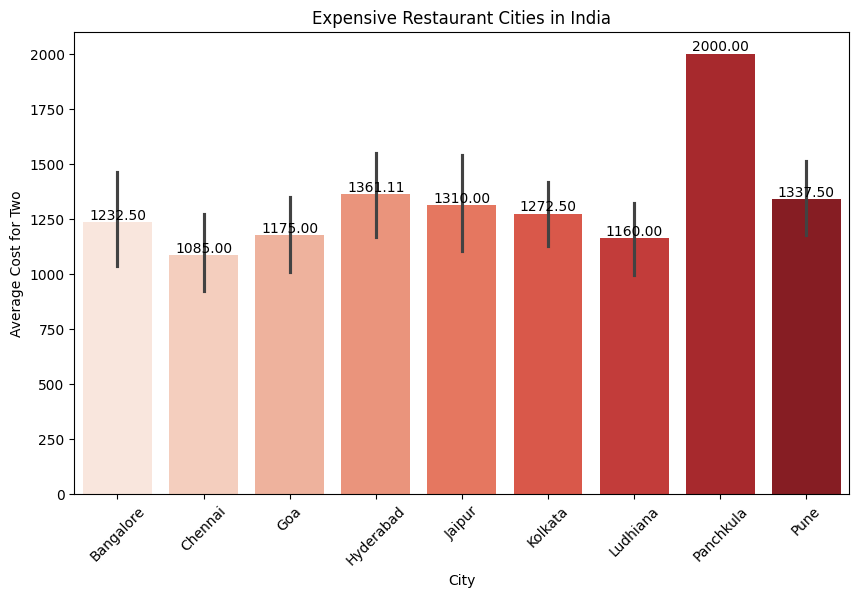

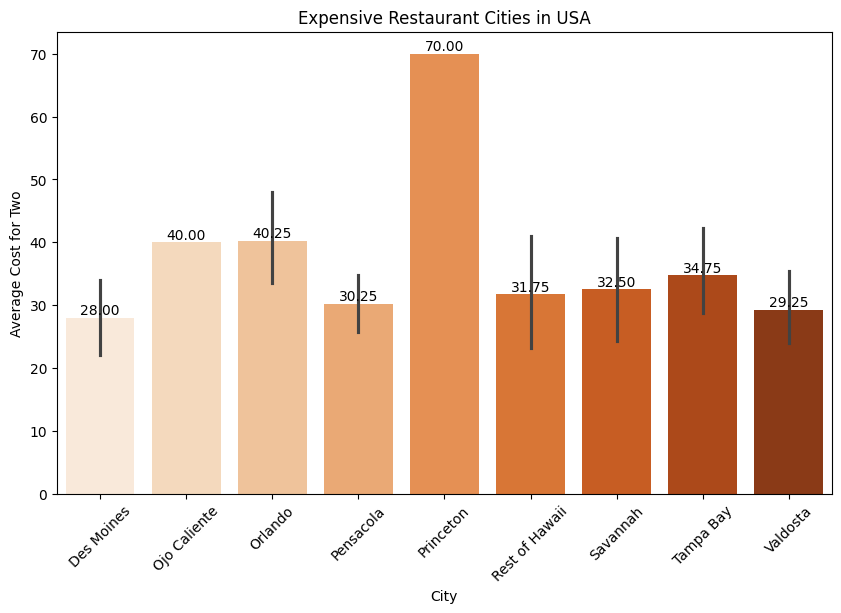

In [112]:


# Function to add values on top of the bars
def add_values_on_bars(ax, space=0.01):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + space,
                f'{height:.2f}', ha='center', va='bottom')

# Filter data for India and the USA
india_data = merged_data[merged_data['Country'] == 'India']
usa_data = merged_data[merged_data['Country'] == 'United States']

# Find the 9 cities with the most expensive average cost for two in India
expensive_cities_india = india_data.groupby('City')['Average Cost for two'].mean().nlargest(9).index

# Find the 9 cities with the most expensive average cost for two in the USA
expensive_cities_usa = usa_data.groupby('City')['Average Cost for two'].mean().nlargest(9).index

# Plot the bar chart for India
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=india_data[india_data['City'].isin(expensive_cities_india)]['City'],
                  y=india_data[india_data['City'].isin(expensive_cities_india)]['Average Cost for two'],
                  palette='Reds')  # Change the color palette
plt.title('Expensive Restaurant Cities in India')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)

# Add values on top of the bars
add_values_on_bars(ax1)

plt.show()

# Plot the bar chart for the USA
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=usa_data[usa_data['City'].isin(expensive_cities_usa)]['City'],
                  y=usa_data[usa_data['City'].isin(expensive_cities_usa)]['Average Cost for two'],
                  palette='Oranges')  # Change the color palette
plt.title('Expensive Restaurant Cities in USA')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)

# Add values on top of the bars
add_values_on_bars(ax2)

plt.show()


In [114]:
import plotly.express as px

# Assuming 'merged_data' is your DataFrame
city_most_votes = merged_data.groupby(['Country', 'City'])['Votes'].sum().nlargest(10).reset_index()

# Round the 'Votes' column to the nearest whole number
city_most_votes['Votes'] = city_most_votes['Votes'].round()

# Create a bar chart with side-by-side bars for each city in different countries
fig = px.bar(city_most_votes, 
             x='City', 
             y='Votes', 
             color='Country',  # Use color to distinguish between countries
             title='City Restaurant with Large Number of Votes',
             labels={'Votes': 'Total Votes'},
             hover_name='City',
             barmode='group',  # Use 'group' for side-by-side bars
             height=600,       # Adjust height as needed
             width=800)         # Adjust width as needed

# Show the plot
fig.show()


In [ ]:
# Assuming 'merged_data' is your DataFrame
# Update column names and data types if necessary

# Group by country and cuisine to calculate average rating
avg_rating_by_cuisine = merged_data.groupby(['Country', 'Cuisines'])['Aggregate rating'].mean().reset_index()

# Create a scatter plot or line plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cuisines', y='Aggregate rating', hue='Country', data=avg_rating_by_cuisine, palette='viridis')
plt.title('Rating vs Cuisine Based on Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

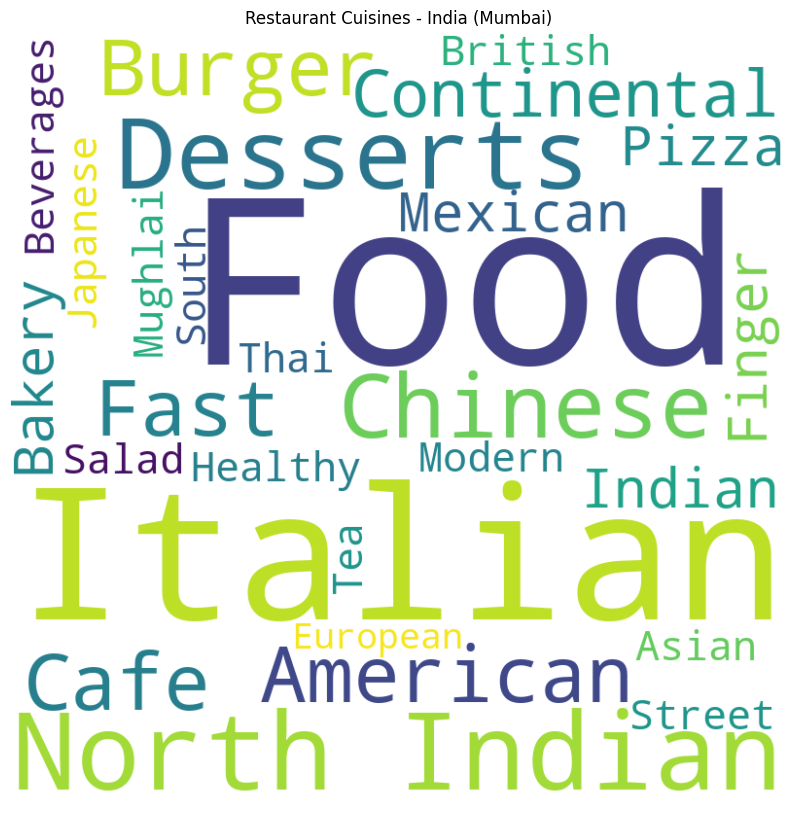

In [121]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example list of cuisine names
cuisine_list = merged_data["Cuisines"].unique()

# Convert the list of cuisine names into a string
comment_words = ' '.join(cuisine_list)

# Define stopwords
stopwords = set(STOPWORDS)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Restaurant Cuisines - Top Restaurants')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Conclusions:
1. Asia Kitchen By Caterspoint,Mazzaro's Italian Market,Sagar Gaire Fast Food ,McGuire's Irish Pub & Brewery 
were the best rated Restaurants.
2. Cafe Coffee Day, Domino's Pizza, Subway, Just Bake ,Green Chick Chop were the top
restaurant chains.
3. 74.3% of resturants accept online orders where as 25.7% donot accept online orders.
4. Based on most voted resaturantsToit,Hauz Khas Social, Peter Cat and Big Brewsky,The Black Pearl were
the best rated restaurånts.
5. Based on most voted resaturants My Bar Square and Cheenos were the worst rated restaurants.
6. New Delhi,Gurgaon,Noida has the most numbers of restaurants.
7. North Indian and Chinese were the top favourite of the people.
8. Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.